<a href="https://colab.research.google.com/github/RafaelAnga/Artificial-Intelligence/blob/main/Supervised-Learning/Classification/XGBoost_Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection Using XGBoost
**Summary of the Code:**
This project uses the XGBoost Classifier to predict whether a breast cancer case is benign or malignant based on patient data. The dataset (breast_cancer.csv) includes features such as cell size, shape, and other medical attributes. The model is trained to classify cases into two categories: benign (0) or malignant (1). The approach involves data preprocessing, model training, evaluation, and validation using k-Fold Cross Validation.

**Business Applications:**

This model can be applied in the healthcare industry to:

* Early Cancer Detection: Assist medical professionals in identifying malignant cases early, improving patient outcomes.
* Diagnostic Support: Provide a second opinion to radiologists and oncologists for more accurate diagnoses.
* Resource Allocation: Prioritize patients with malignant cases for further testing or treatment.
* Research and Development: Analyze patterns in cancer data to improve diagnostic abilities and treatment plans.

## Importing the libraries

In [1]:
# Importing necessary libraries for data manipulation, visualization, and computations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Install specific versions of libraries (ensures compatibility and reproducibility)

In [2]:
!pip install xgboost==2.1.2
!pip install scikit-learn==1.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


## Importing the dataset

In [9]:
# Mount Google Drive to access data (Colab-specific)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Library necesary to access the folder route
import os
os.chdir('/content/drive/MyDrive/Projects/Breast-Cancer-Detection/DataSet')

# Display the list of files to confirm dataset availability
os.listdir()

['breast_cancer.csv']

In [11]:
# Load the dataset into a Pandas DataFrame
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, :-1].values  # Features: all columns except the last one
y = dataset.iloc[:, -1].values  # Target: the last column

In [12]:
# Display the first 5 rows of the dataset for viewing purposes
dataset.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
# Show dataset information (columns, data types, and non-null values)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


# Conversion of labels to binary values

In [14]:
# Checking library versions
import xgboost
import sklearn
print("XGBoost version:", xgboost.__version__)
print("scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.2
scikit-learn version: 1.5.1


In [15]:
# The target column is converted to binary for classification
y_binary = (y == 4).astype(int)

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
# Divide the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=0)

## Training the XGBOOST model on the Training set

In [17]:
from xgboost import XGBClassifier
# Initialize the classifier with a specific evaluation metric
classifier = XGBClassifier(eval_metric='logloss')
classifier.fit(X_train, y_train)  # Train the model on the training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)  # Predict labels for the test set

## Evaluating the model with a confusion matrix

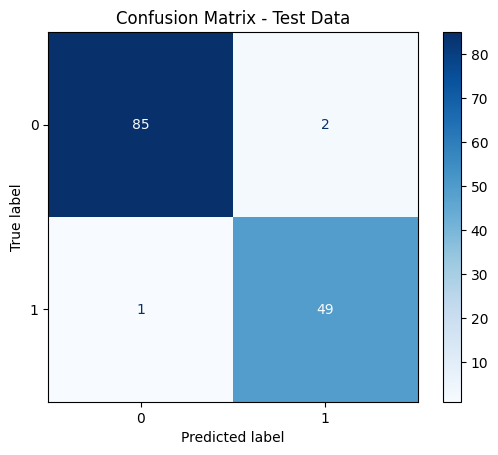


Model Accuracy: 0.9781021897810219


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.show()
# Print the model's accuracy
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

## Computing the accuracy with k-Fold Cross Validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize K-Fold Cross-Validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy_scores = []  # Store accuracy scores for each fold

# Perform manual cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # Train the model on the current fold
    classifier.fit(X_train_cv, y_train_cv)
    # Predict and compute accuracy for the validation set
    y_pred_cv = classifier.predict(X_test_cv)
    accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))

# Calculate and display mean accuracy and standard deviation
mean_accuracy = np.mean(accuracy_scores) * 100
std_deviation = np.std(accuracy_scores) * 100
print(f"Mean Accuracy: {mean_accuracy:.2f} %")
print(f"Standard Deviation: {std_deviation:.2f} %")

Mean Accuracy: 97.07 %
Standard Deviation: 2.37 %


# Technical Summary of the Project:
**Data Preprocessing:**
* The dataset is loaded, and the target variable (labels) is converted into binary values: 0 for benign and 1 for malignant.
* The data is split into training (80%) and testing (20%) sets.

**Model Training:**

* The XGBoost Classifier is used with the logloss evaluation metric to train the model on the training data.

**Model Evaluation:**
* A Confusion Matrix is used to visualize the model's performance, showing the number of correctly and incorrectly classified cases.
* The accuracy score is calculated to measure the model's performance on the test set.

**Validation:**
* k-Fold Cross Validation (with 10 splits) is performed to ensure the model's reliability and robustness.
* The mean accuracy and standard deviation across all folds are calculated to assess the model's consistency.